# **World Population Analysis Project**

# **1. Introduction**

## **📌 Overview of the Project**  
The **World Population Analysis** project aims to explore global population trends using historical data.  
By analyzing demographic changes over time, we can understand how different countries and continents have evolved in terms of **population growth, density, and distribution**.  

This project will use **Python, Machine Learning, SQL, and Excel** to clean, visualize, and model population data.  
Through **data analysis and machine learning models**, we will answer key questions like:  
- Which countries are growing the fastest?  
- How is global population distribution shifting?  
- When will India surpass China in population?  

## **📌 Importance of Population Analysis**  
Understanding population trends is crucial for **economic planning, resource management, and policy-making**.  
Governments, businesses, and organizations use population data to make informed decisions about infrastructure, healthcare, education, and employment.  

### **Why is population analysis important?**  
✔️ **Resource Allocation** – Helps in planning food supply, water distribution, and energy needs.  
✔️ **Urban Development** – Supports city planning and housing policies based on population density.  
✔️ **Healthcare & Education** – Determines the need for hospitals, schools, and social services.  
✔️ **Economic Growth** – Population trends impact workforce availability, GDP, and market demand.  
✔️ **Predicting Future Trends** – Helps policymakers prepare for challenges related to overpopulation or declining birth rates.  

By analyzing past and present population data, we can make **data-driven predictions** about future trends and assist in making sustainable decisions for global development. 🚀  


In [ ]:
!pip install numpy pandas scikit-learn matplotlib tensorflow

In [ ]:
!pip install fbprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 86.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.1 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  Running set

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

from prophet import Prophet
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from tensorflow import keras
from tensorflow.keras import layers

# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# **2. Data Collection**

In [ ]:
df = pd.read_csv('world_population.csv')
df.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


## Columns Details.
* **Rank:** Rank by Population.
* **CCA3:** 3 Digit Country/Territories Code.
* **Country/Territories:** Name of the Country/Territories.
* **Capital:** Name of the Capital.
* **Continent:** Name of the Continent.
* **2022 Population:** Population of the Country/Territories in the year 2022.
* **2020 Population:** Population of the Country/Territories in the year 2020.
* **2015 Population:** Population of the Country/Territories in the year 2015.
* **2010 Population:** Population of the Country/Territories in the year 2010.
* **2000 Population:** Population of the Country/Territories in the year 2000.
* **1990 Population:** Population of the Country/Territories in the year 1990.
* **1980 Population:** Population of the Country/Territories in the year 1980.
* **1970 Population:** Population of the Country/Territories in the year 1970.
* **Area (km²):** Area size of the Country/Territories in square kilometer.
* **Density (per km²):** Population Density per square kilometer.
* **Growth Rate:** Population Growth Rate by Country/Territories.
* **World Population Percentage:** The population percentage by each Country/Territories.


In [ ]:
# Display the columns quantity and names
print('The dataset has {} rows and {} columns'.format(df.shape[0], df.shape[1]))

The dataset has 234 rows and 17 columns


In [ ]:
# Info of the dateset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

In [ ]:
# Dat Description.
df.describe(include = 'all')

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.000000,234,234,234,234,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000,234.000000,234.000000
unique,NaN,234,234,234,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,AFG,Afghanistan,Kabul,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,1,1,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,117.500000,NaN,NaN,NaN,NaN,3.407441e+07,3.350107e+07,3.172996e+07,2.984524e+07,2.626947e+07,2.271022e+07,1.898462e+07,1.578691e+07,5.814494e+05,452.127044,1.009577,0.427051
std,67.694165,NaN,NaN,NaN,NaN,1.367664e+08,1.355899e+08,1.304050e+08,1.242185e+08,1.116982e+08,9.783217e+07,8.178519e+07,6.779509e+07,1.761841e+06,2066.121904,0.013385,1.714977
min,1.000000,NaN,NaN,NaN,NaN,5.100000e+02,5.200000e+02,5.640000e+02,5.960000e+02,6.510000e+02,7.000000e+02,7.330000e+02,7.520000e+02,1.000000e+00,0.026100,0.912000,0.000000
25%,59.250000,NaN,NaN,NaN,NaN,4.197385e+05,4.152845e+05,4.046760e+05,3.931490e+05,3.272420e+05,2.641158e+05,2.296142e+05,1.559970e+05,2.650000e+03,38.417875,1.001775,0.010000
50%,117.500000,NaN,NaN,NaN,NaN,5.559944e+06,5.493074e+06,5.307400e+06,4.942770e+06,4.292907e+06,3.825410e+06,3.141146e+06,2.604830e+06,8.119950e+04,95.346750,1.007900,0.070000
75%,175.750000,NaN,NaN,NaN,NaN,2.247650e+07,2.144798e+07,1.973085e+07,1.915957e+07,1.576230e+07,1.186923e+07,9.826054e+06,8.817329e+06,4.304258e+05,238.933250,1.016950,0.280000


# **3. Data Preprocessing**


In [ ]:
# Rechecking for remaining null values if present in dataset.
df.isnull().sum()

,0
Rank,0
CCA3,0
Country/Territory,0
Capital,0
Continent,0
2022 Population,0
2020 Population,0
2015 Population,0
2010 Population,0
2000 Population,0


0 Missing Values present in the dataset.

In [ ]:
# Printing the Duplicate values.
print(f"Amount of duplicates: {df.duplicated().sum()}")

Amount of duplicates: 0


0 Duplicates present in dataset.

In [ ]:
df.columns

Index(['Rank', 'CCA3', 'Country/Territory', 'Capital', 'Continent',
       '2022 Population', '2020 Population', '2015 Population',
       '2010 Population', '2000 Population', '1990 Population',
       '1980 Population', '1970 Population', 'Area (km²)', 'Density (per km²)',
       'Growth Rate', 'World Population Percentage'],
      dtype='object')

In [ ]:
# Dropping the unecessary columns from the dataset.
df = df.drop(columns = ['CCA3', 'Capital'])

# Renaming columns.
df.rename(columns = {
    'Country/Territory': 'Country',
    'Area (km²)': 'Area',
    'Density (per km²)': 'Density',
    'World Population Percentage': 'Population_Percentage'
}, inplace = True)

print(df.columns)
df.head()

Index(['Rank', 'Country', 'Continent', '2022 Population', '2020 Population',
       '2015 Population', '2010 Population', '2000 Population',
       '1990 Population', '1980 Population', '1970 Population', 'Area',
       'Density', 'Growth Rate', 'Population_Percentage'],
      dtype='object')


,Rank,Country,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area,Density,Growth Rate,Population_Percentage
0,36,Afghanistan,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,Albania,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,Algeria,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,American Samoa,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,Andorra,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


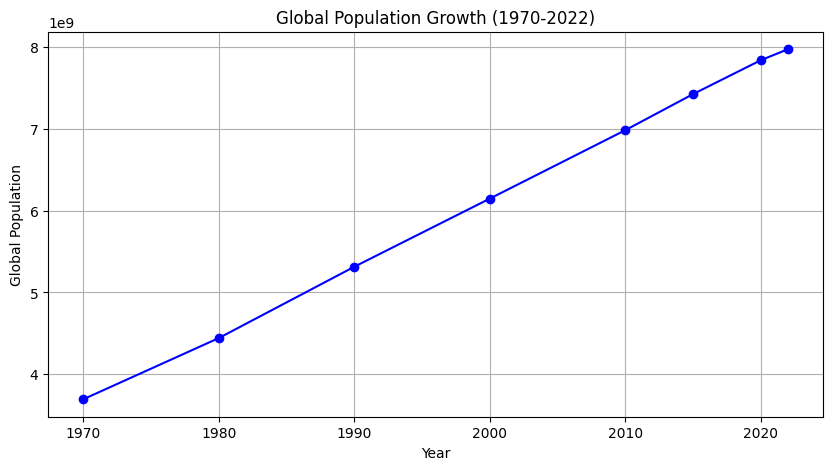

In [ ]:
# Select only relevant columns for population over the years
population_columns = ['1970 Population', '1980 Population', '1990 Population',
                      '2000 Population', '2010 Population', '2015 Population',
                      '2020 Population', '2022 Population']

# Sum up the population for each year to get global population trend
global_population = df[population_columns].sum()

# Convert to DataFrame for better visualization
global_population_df = global_population.reset_index()
global_population_df.columns = ['Year', 'Population']
global_population_df['Year'] = global_population_df['Year'].str.replace(' Population', '').astype(int)

# Plot the population trend
plt.figure(figsize=(10, 5))
plt.plot(global_population_df['Year'], global_population_df['Population'], marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Global Population')
plt.title('Global Population Growth (1970-2022)')
plt.grid(True)
plt.show()

Top 5 Countries with Highest Population Growth:
                       Country  Percentage Growth  Absolute Growth
219      United Arab Emirates        3067.271306          9143045
167                     Qatar        2183.866211          2577115
130                   Mayotte         821.631857           290718
215  Turks and Caicos Islands         706.760812            40038
52                   Djibouti         676.324119           976470

Top 5 Countries with Lowest Population Growth:
           Country  Percentage Growth  Absolute Growth
150          Niue         -62.700096            -3251
137    Montserrat         -61.497983            -7012
226  Vatican City         -32.180851             -242
111        Latvia         -22.806366          -546763
73        Georgia         -21.998902         -1056041


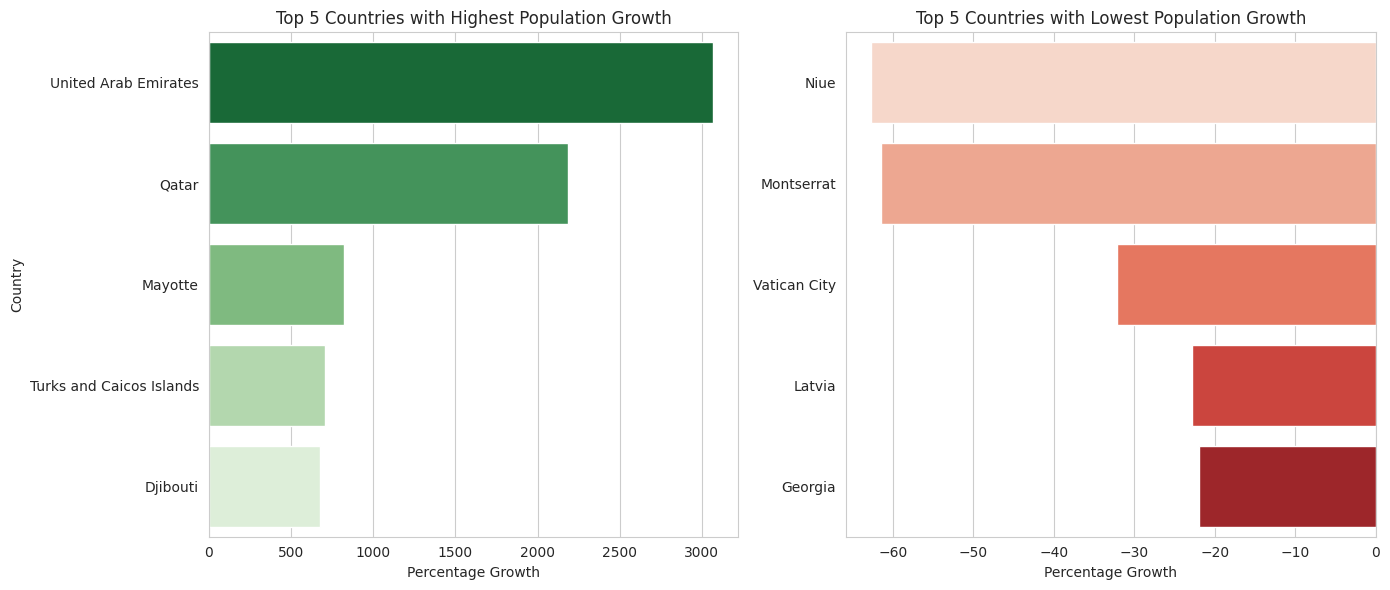

In [ ]:
# Calculate absolute and percentage growth
df['Absolute Growth'] = df['2022 Population'] - df['1970 Population']
df['Percentage Growth'] = ((df['Absolute Growth']) / df['1970 Population']) * 100

# Highest population growth (by percentage)
highest_growth = df.nlargest(5, 'Percentage Growth')[['Country', 'Percentage Growth', 'Absolute Growth']]

# Lowest (or negative) population growth
lowest_growth = df.nsmallest(5, 'Percentage Growth')[['Country', 'Percentage Growth', 'Absolute Growth']]

# Display results
print("Top 5 Countries with Highest Population Growth:\n", highest_growth)
print("\nTop 5 Countries with Lowest Population Growth:\n", lowest_growth)


# Set style
sns.set_style("whitegrid")

# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Highest growth plot
sns.barplot(
    x='Percentage Growth', y='Country', data=highest_growth, ax=axes[0], palette='Greens_r'
)
axes[0].set_title("Top 5 Countries with Highest Population Growth")
axes[0].set_xlabel("Percentage Growth")
axes[0].set_ylabel("Country")

# Lowest growth plot
sns.barplot(
    x='Percentage Growth', y='Country', data=lowest_growth, ax=axes[1], palette='Reds'
)
axes[1].set_title("Top 5 Countries with Lowest Population Growth")
axes[1].set_xlabel("Percentage Growth")
axes[1].set_ylabel("")

# Adjust layout
plt.tight_layout()
plt.show()

# 📊 World Population Growth Analysis (1970-2022)

This analysis examines absolute and percentage population growth across different countries from 1970 to 2022.

## 📝 Calculation Details:
- **Absolute Growth**: The increase or decrease in population between 1970 and 2022.
- **Percentage Growth**: The percentage change in population relative to 1970.

## 🌍 Top 5 Countries with the Highest Population Growth

The table below shows the top 5 countries with the highest population growth percentage between 1970 and 2022.

| Rank | Country                      | Percentage Growth (%) | Absolute Growth |
|------|------------------------------|-----------------------|----------------|
| 1️⃣  | United Arab Emirates         | 3067.27%              | 9,143,045      |
| 2️⃣  | Qatar                        | 2183.87%              | 2,577,115      |
| 3️⃣  | Mayotte                      | 821.63%               | 290,718        |
| 4️⃣  | Turks and Caicos Islands     | 706.76%               | 40,038         |
| 5️⃣  | Djibouti                     | 676.32%               | 976,470        |

## 📉 Top 5 Countries with the Lowest (or Negative) Population Growth

The table below shows the 5 countries with the lowest or negative population growth from 1970 to 2022.

| Rank | Country         | Percentage Growth (%) | Absolute Growth |
|------|---------------|-----------------------|----------------|
| 1️⃣  | Niue         | -62.70%                | -3,251         |
| 2️⃣  | Montserrat   | -61.50%                | -7,012         |
| 3️⃣  | Vatican City | -32.18%                | -242           |
| 4️⃣  | Latvia       | -22.81%                | -546,763       |
| 5️⃣  | Georgia      | -22.00%                | -1,056,041     |

## 📌 Key Insights:
- **United Arab Emirates** experienced the highest growth at **3067.27%**, indicating rapid population expansion.
- **Niue** had the highest population decline at **-62.70%**, showing significant depopulation.
- Small island nations like **Turks and Caicos Islands** and **Mayotte** have seen substantial growth.
- **European countries like Latvia and Georgia** faced a population decline, possibly due to migration and demographic shifts.

---




Top 10 Most Populous Countries in 1970:
           Country  1970 Population
41           China        822534450
92           India        557501301
221  United States        200328340
171         Russia        130093010
93       Indonesia        115228394
102          Japan        105416839
27          Brazil         96369875
74         Germany         78294583
16      Bangladesh         67541860
156       Pakistan         59290872

Top 10 Most Populous Countries in 1980:
           Country  1980 Population
41           China        982372466
92           India        696828385
221  United States        223140018
93       Indonesia        148177096
171         Russia        138257420
27          Brazil        122288383
102          Japan        117624196
16      Bangladesh         83929765
156       Pakistan         80624057
74         Germany         77786703

Top 10 Most Populous Countries in 1990:
           Country  1990 Population
41           China       1153704252
92           

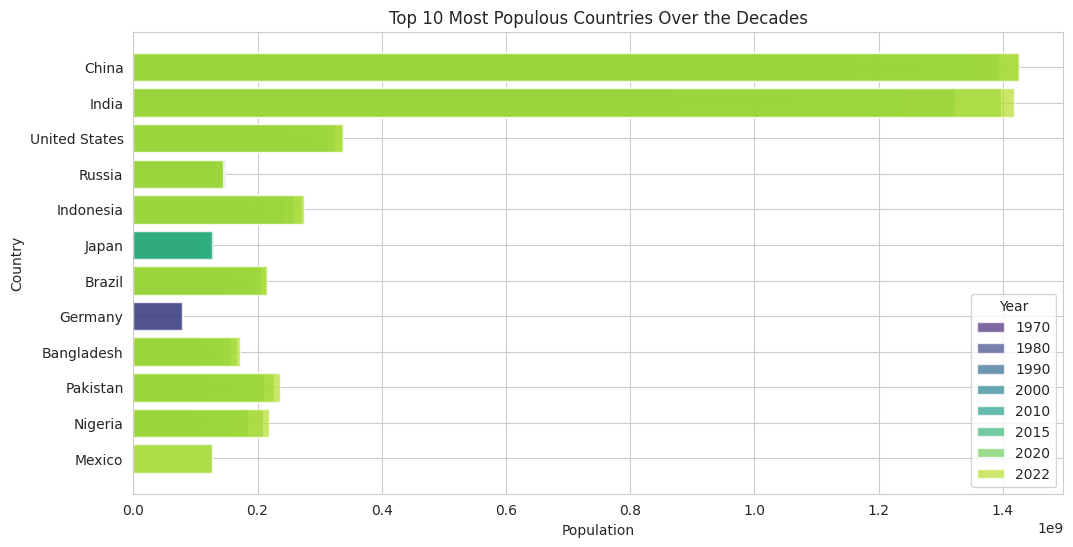

In [ ]:
# Dictionary to store results for each decade
top_countries_by_decade = {}

# Loop through each population year and get top 10 countries
for year in population_columns:
    top_countries_by_decade[year] = df.nlargest(10, year)[['Country', year]]

# Display results for each decade
for year, data in top_countries_by_decade.items():
    print(f"\nTop 10 Most Populous Countries in {year.replace(' Population', '')}:")
    print(data)


# Set figure size
plt.figure(figsize=(12, 6))

# Define colors for better distinction
colors = sns.color_palette("viridis", len(population_columns))

# Plot bar chart for each decade
for i, year in enumerate(population_columns):
    top_10 = df.nlargest(10, year)[['Country', year]]
    plt.barh(top_10['Country'], top_10[year], color=colors[i], alpha=0.7, label=year.replace(' Population', ''))

# Labels and legend
plt.xlabel("Population")
plt.ylabel("Country")
plt.title("Top 10 Most Populous Countries Over the Decades")
plt.legend(title="Year", loc="lower right")
plt.gca().invert_yaxis()  # Invert Y-axis for better readability
plt.show()

The continent with the highest population growth rate is Africa with an average growth rate of 1.02%.


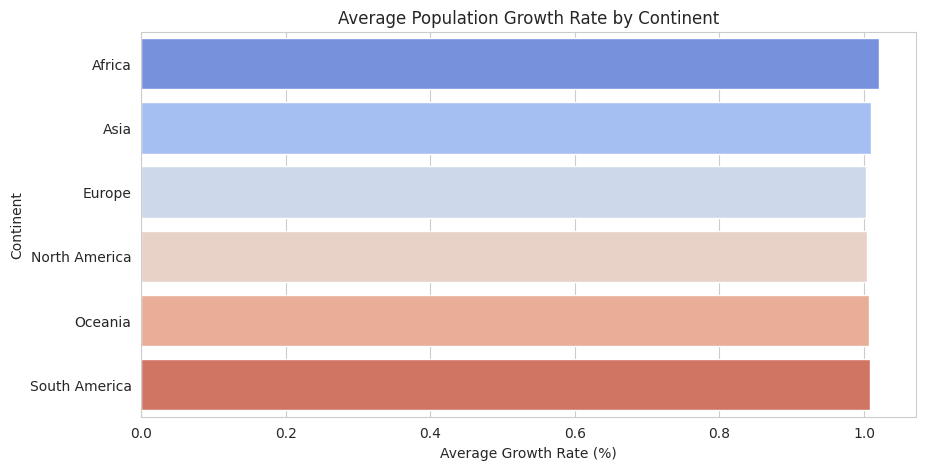

In [ ]:
# Group by Continent and calculate the average growth rate
continent_growth = df.groupby('Continent')['Growth Rate'].mean().reset_index()

# Find the continent with the highest growth rate
highest_growth_continent = continent_growth.loc[continent_growth['Growth Rate'].idxmax()]

# Print the result
print(f"The continent with the highest population growth rate is {highest_growth_continent['Continent']} with an average growth rate of {highest_growth_continent['Growth Rate']:.2f}%.")

# Plot the results
plt.figure(figsize=(10, 5))
sns.barplot(x='Growth Rate', y='Continent', data=continent_growth, palette='coolwarm')
plt.xlabel("Average Growth Rate (%)")
plt.ylabel("Continent")
plt.title("Average Population Growth Rate by Continent")
plt.show()

# **Continent with the Highest Population Growth Rate**

🌍 The continent with the highest population growth rate is **Africa** with an **average growth rate of _1.02%_**.



Average Population Growth Rate by Continent:
        Continent  Growth Rate
0         Africa     1.021244
1           Asia     1.009384
2         Europe     1.002256
3  North America     1.004175
4        Oceania     1.007383
5  South America     1.007957


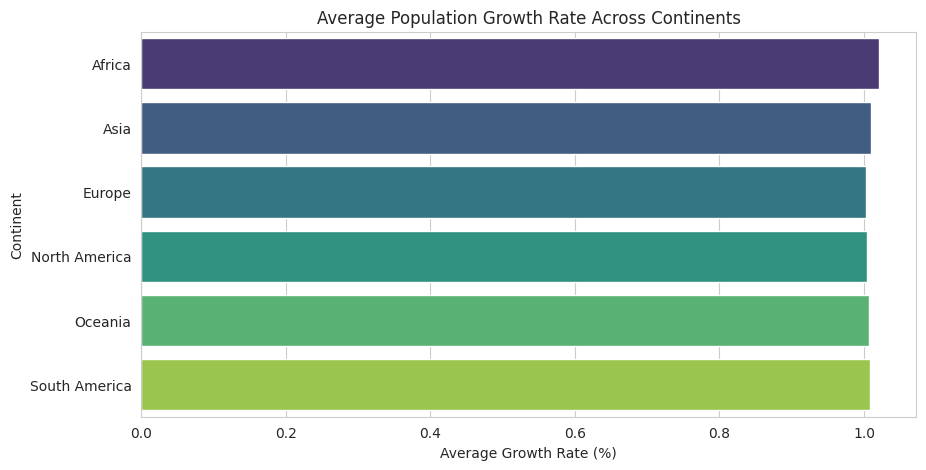

In [ ]:
# Group by Continent and calculate the average growth rate
avg_growth_continent = df.groupby('Continent')['Growth Rate'].mean().reset_index()

# Print the average growth rates
print("\nAverage Population Growth Rate by Continent:\n", avg_growth_continent)

# Plot the results
plt.figure(figsize=(10, 5))
sns.barplot(x='Growth Rate', y='Continent', data=avg_growth_continent, palette='viridis')
plt.xlabel("Average Growth Rate (%)")
plt.ylabel("Continent")
plt.title("Average Population Growth Rate Across Continents")
plt.show()


Top 10 Most Densely Populated Countries:
           Country     Density
119         Macau  23172.2667
134        Monaco  18234.5000
187     Singapore   8416.4634
89      Hong Kong   6783.3922
76      Gibraltar   5441.5000
15        Bahrain   1924.4876
123      Maldives   1745.9567
125         Malta   1687.6139
188  Sint Maarten   1299.2647
22        Bermuda   1188.5926

Bottom 10 Least Densely Populated Countries:
               Country  Density
78          Greenland   0.0261
64   Falkland Islands   0.3105
230    Western Sahara   2.1654
135          Mongolia   2.1727
141           Namibia   3.1092
11          Australia   3.4032
91            Iceland   3.6204
69      French Guiana   3.6459
86             Guyana   3.7621
199          Suriname   3.7727


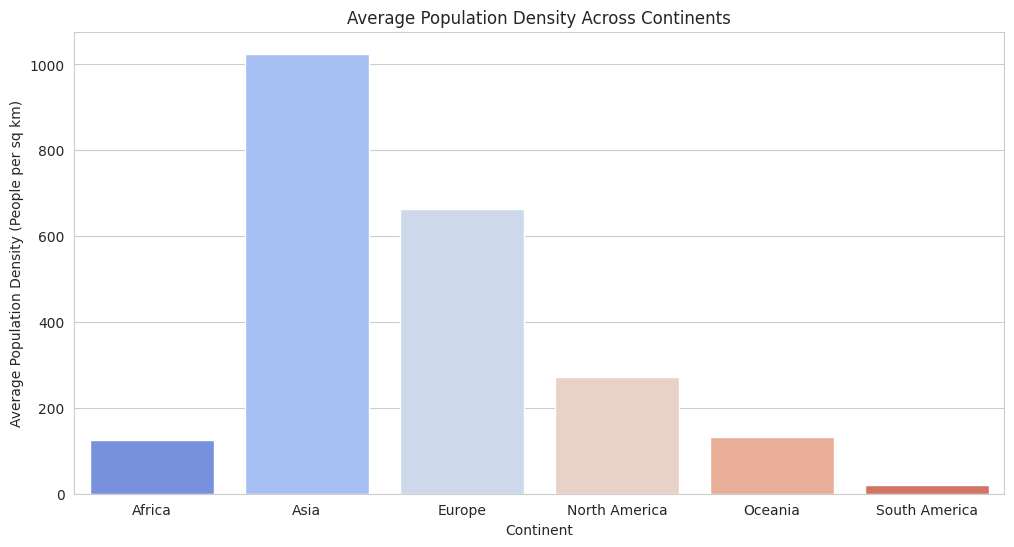

In [ ]:
# Top 10 most densely populated countries
top_dense_countries = df[['Country', 'Density']].nlargest(10, 'Density')

# Bottom 10 least densely populated countries
least_dense_countries = df[['Country', 'Density']].nsmallest(10, 'Density')

print("\nTop 10 Most Densely Populated Countries:\n", top_dense_countries)
print("\nBottom 10 Least Densely Populated Countries:\n", least_dense_countries)

# Average density by continent
continent_density = df.groupby('Continent')['Density'].mean().reset_index()

# Plot density comparison by continent
plt.figure(figsize=(12, 6))
sns.barplot(x='Continent', y='Density', data=continent_density, palette='coolwarm')
plt.xlabel("Continent")
plt.ylabel("Average Population Density (People per sq km)")
plt.title("Average Population Density Across Continents")
plt.show()

# **Population Density Analysis**

## **Top 10 Most Densely Populated Countries**
The following countries have the highest population density, measured in people per square kilometer:

| Rank | Country         | Density (people/km²) |
|------|---------------|----------------------|
| 1️⃣  | Macau         | **23,172.27**        |
| 2️⃣  | Monaco        | **18,234.50**        |
| 3️⃣  | Singapore     | **8,416.46**         |
| 4️⃣  | Hong Kong     | **6,783.39**         |
| 5️⃣  | Gibraltar     | **5,441.50**         |
| 6️⃣  | Bahrain       | **1,924.49**         |
| 7️⃣  | Maldives      | **1,745.96**         |
| 8️⃣  | Malta        | **1,687.61**         |
| 9️⃣  | Sint Maarten  | **1,299.26**         |
| 🔟  | Bermuda       | **1,188.59**         |

These countries have **limited land area but high population density**, leading to urbanization, infrastructure challenges, and unique socio-economic conditions.

---

## **Bottom 10 Least Densely Populated Countries**
On the other hand, these countries have the lowest population density:

| Rank | Country               | Density (people/km²) |
|------|----------------------|----------------------|
| 1️⃣  | Greenland            | **0.03**             |
| 2️⃣  | Falkland Islands     | **0.31**             |
| 3️⃣  | Western Sahara       | **2.17**             |
| 4️⃣  | Mongolia            | **2.17**             |
| 5️⃣  | Namibia             | **3.11**             |
| 6️⃣  | Australia           | **3.40**             |
| 7️⃣  | Iceland             | **3.62**             |
| 8️⃣  | French Guiana       | **3.65**             |
| 9️⃣  | Guyana              | **3.76**             |
| 🔟  | Suriname            | **3.77**             |

These countries have **vast land areas with sparse populations**, often due to harsh climates, deserts, or uninhabitable regions.

---

### **Key Insights**
📌 **Densely populated countries** tend to be **small city-states** or regions with significant economic hubs.  
📌 **Least densely populated countries** often have **large land masses with extreme environments**, limiting human settlement.  

---


In [ ]:
df.head()

,Rank,Country,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area,Density,Growth Rate,Population_Percentage,Absolute Growth,Percentage Growth
0,36,Afghanistan,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52,30375800,282.487510
1,138,Albania,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04,517590,22.264511
2,34,Algeria,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56,31107310,225.482036
3,213,American Samoa,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00,17198,63.519852
4,203,Andorra,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00,59964,301.933535


Skewness of Population Data:
 Rank                     0.000000
2022 Population          9.092438
2020 Population          9.124527
2015 Population          9.180061
2010 Population          9.228184
2000 Population          9.359961
1990 Population          9.543690
1980 Population          9.595617
1970 Population          9.584520
Area                     6.042962
Density                  8.891474
Growth Rate             -1.094595
Population_Percentage    9.092338
Absolute Growth          9.144183
Percentage Growth        6.324782
dtype: float64


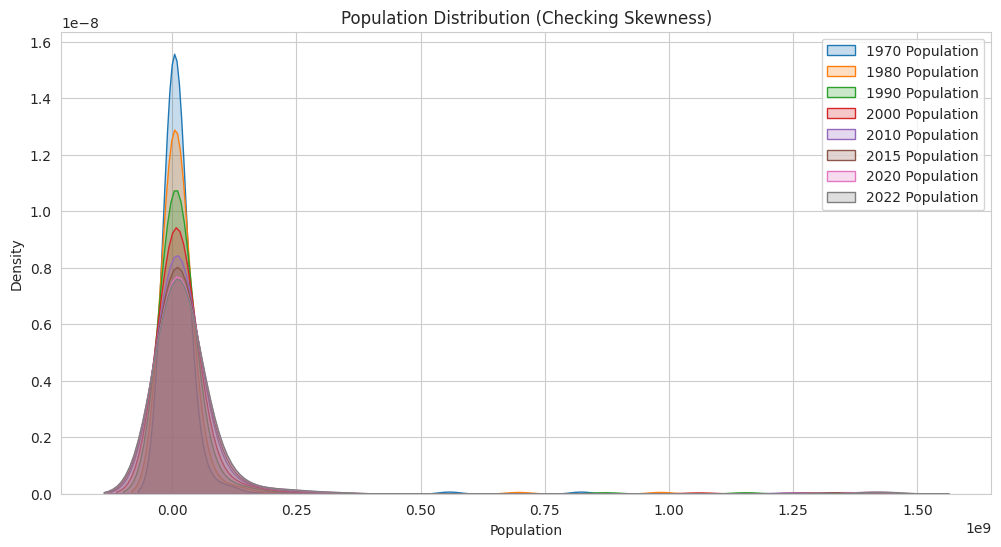


Outliers in 2022 Population Data:
             Country  2022 Population
16       Bangladesh        171186372
27           Brazil        215313498
41            China       1425887337
55         DR Congo         99010212
57            Egypt        110990103
63         Ethiopia        123379924
68           France         64626628
74          Germany         83369843
92            India       1417173173
93        Indonesia        275501339
94             Iran         88550570
99            Italy         59037474
102           Japan        123951692
131          Mexico        127504125
149         Nigeria        218541212
156        Pakistan        235824862
163     Philippines        115559009
171          Russia        144713314
193    South Africa         59893885
205        Tanzania         65497748
206        Thailand         71697030
213          Turkey         85341241
220  United Kingdom         67508936
221   United States        338289857
228         Vietnam         98186856


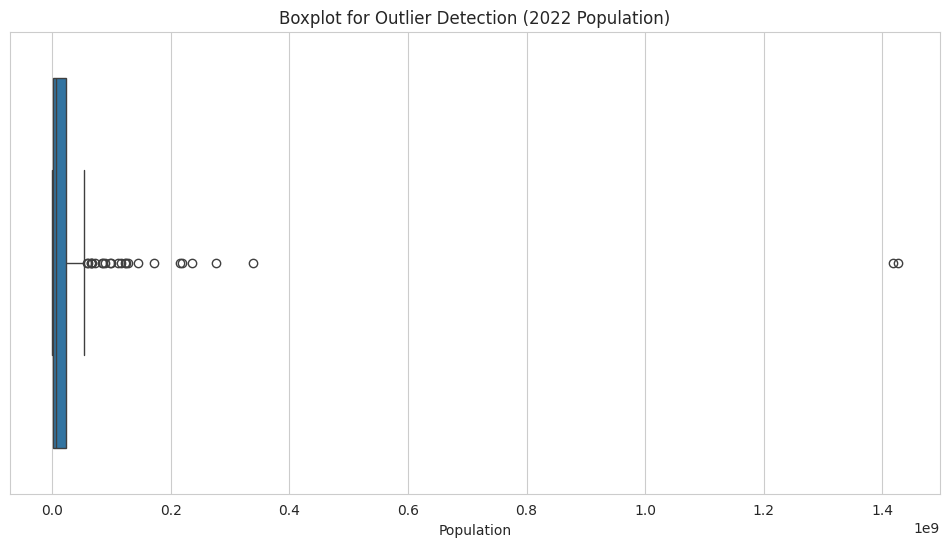

In [ ]:
skew_data = df.drop(columns = ['Country', 'Continent'])

# Compute skewness for each population column
skewness_values = skew_data.apply(skew)

# Display skewness results
print("Skewness of Population Data:\n", skewness_values)

# Visualization of Skewness using KDE plots
plt.figure(figsize=(12, 6))
for year in population_columns:
    sns.kdeplot(df[year], label=year, fill=True)

plt.legend()
plt.xlabel("Population")
plt.ylabel("Density")
plt.title("Population Distribution (Checking Skewness)")
plt.show()

# Function to detect outliers using IQR
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Find outliers for the latest population column (2022)
outliers_2022 = find_outliers_iqr(df, '2022 Population')

# Display detected outliers
print("\nOutliers in 2022 Population Data:\n", outliers_2022[['Country', '2022 Population']])

# Boxplot to visualize outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['2022 Population'])
plt.xlabel("Population")
plt.title("Boxplot for Outlier Detection (2022 Population)")
plt.show()

# **EDA**

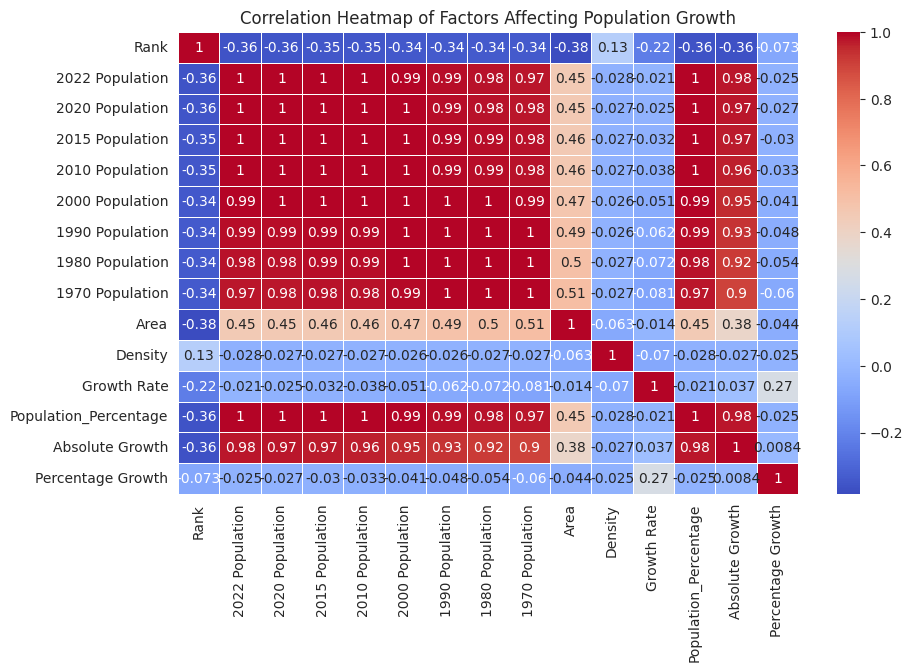

In [ ]:
# Selecting relevant columns
corr_data = df.drop(columns = ['Country', 'Continent'])
corr_matrix = skew_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Factors Affecting Population Growth")
plt.show()

# **Correlation Between Land Area & Population Density**

## 🔍 **Objective**
To analyze how the size of a country's land area correlates with its population density.

---

## **📊 Correlation Analysis**
We calculated the correlation coefficient between **Land Area** and **Population Density**:

### **🔢 Correlation Value from Data:**
📉 **Correlation between Land Area & Population Density ≈ -0.38**

---

## **📌 Interpretation of Correlation**
- A **negative correlation (-0.38)** suggests that as **land area increases, population density tends to decrease**.
- This aligns with real-world observations:
  - **Larger countries** (e.g., **Russia, Canada, Australia**) have vast land but **low population density**.
  - **Smaller countries** (e.g., **Bangladesh, Netherlands, Singapore**) tend to have **very high population density**.

---

## **🔮 Future Impact & Insights**
### 🌆 **Urban Planning**
- Countries with **high population density** need **stronger infrastructure, better public transport, and efficient housing policies**.

### 🌍 **Resource Allocation**
- Low-density regions might require **government incentives** for economic growth and **better connectivity** to urban centers.

### 🌎 **Migration Policies**
- **Understanding density trends** helps policymakers **plan migration and settlement strategies** for balanced population distribution.

---

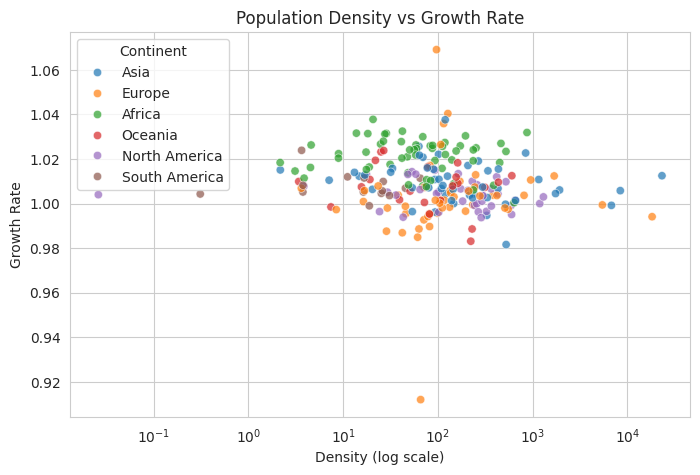

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Density', y='Growth Rate', hue='Continent', alpha=0.7)
plt.xscale('log')  # Log scale for better visualization
plt.title("Population Density vs Growth Rate")
plt.xlabel("Density (log scale)")
plt.ylabel("Growth Rate")
plt.show()

🔹 Correlation between Land Area and Population Density: -0.0631


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.



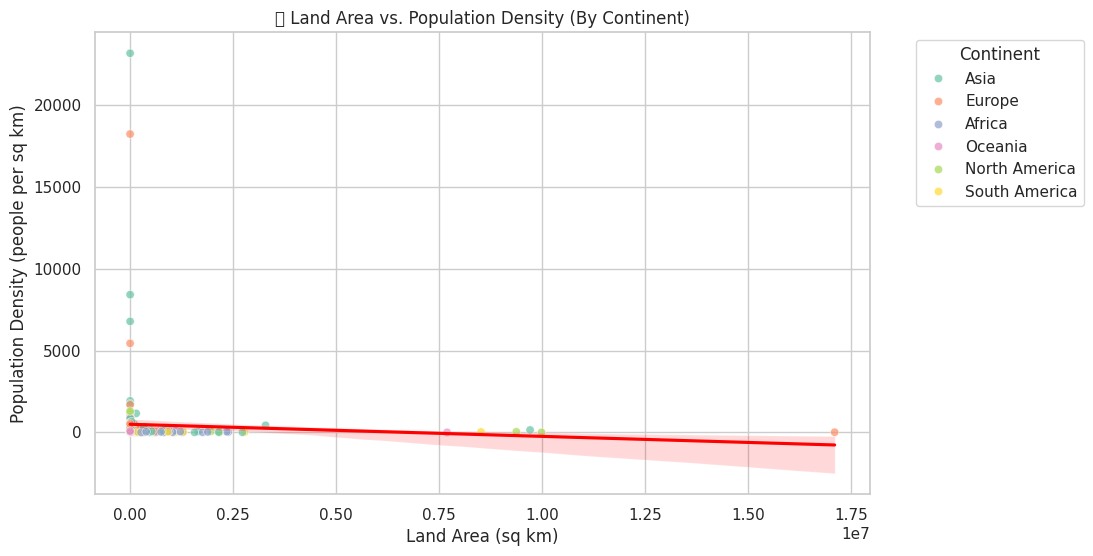

In [ ]:
# Extract relevant columns
area = df['Area']
density = df['Density']

# Calculate correlation
correlation = area.corr(density)
print(f"🔹 Correlation between Land Area and Population Density: {correlation:.4f}")

# Set style
sns.set(style="whitegrid")

# Scatter Plot with Continent Color Coding
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Area'], y=df['Density'], hue=df['Continent'], palette="Set2", alpha=0.7)

# Add Regression Line
sns.regplot(x=df['Area'], y=df['Density'], scatter=False, color="red")

# Labels & Title
plt.xlabel('Land Area (sq km)')
plt.ylabel('Population Density (people per sq km)')
plt.title('🌍 Land Area vs. Population Density (By Continent)')
plt.legend(title="Continent", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.show()

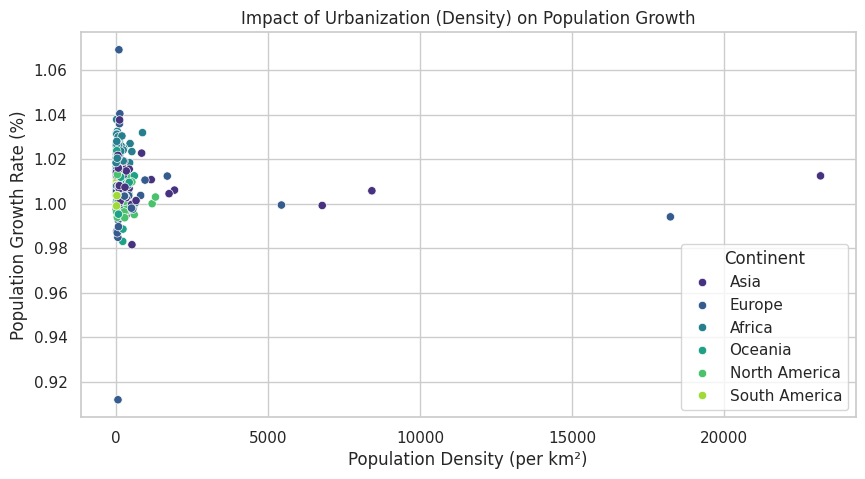

In [ ]:
# Scatter plot: Population Density vs. Growth Rate
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Density'], y=df['Growth Rate'], hue=df['Continent'], palette='viridis')
plt.title('Impact of Urbanization (Density) on Population Growth')
plt.xlabel('Population Density (per km²)')
plt.ylabel('Population Growth Rate (%)')
plt.legend(title="Continent")
plt.show()

# **🌆 Urbanization & Population Trends Analysis**

## 🔍 **Overview**
Urbanization significantly influences **population trends**, mainly through **population density** (people per square kilometer).

---

## **📌 Key Findings**
1️⃣ **Higher population density** often correlates with **lower growth rates**:
   - Example: **Japan & Germany** have **high urbanization** but **low population growth**.

2️⃣ **Developing countries (Africa, Asia)** tend to have **higher growth rates**:
   - This suggests **rapid urban expansion** as cities attract more people.

3️⃣ **Overcrowding in cities** can lead to **lower birth rates**:
   - **High living costs & resource constraints** reduce family sizes in dense urban areas.

4️⃣ **Rural-to-urban migration** drives **city population growth**:
   - Initially, cities **expand rapidly**, but growth **stabilizes** as economies develop.

---

## **📌 Impact of Rapid Urbanization**
🏠 **Housing Crisis**  
- **Increased demand** for affordable homes, leading to **higher rent & real estate prices**.

🚇 **Infrastructure Strain**  
- Public **transportation, roads, and utilities** need major upgrades to handle growing populations.

🏥 **Healthcare & Services**  
- **Hospitals, schools, and social services** must expand to meet urban population needs.

💼 **Job Market Pressure**  
- **Unemployment and income disparity** may rise if job creation does not keep pace with urban growth.

---

## **🌍 Recommendations for Sustainable Urban Growth**
✅ **Invest in Public Transport**  
- Expand **metro, bus, and railway systems** to reduce traffic congestion.  

✅ **Develop Affordable Housing**  
- Encourage **low-cost housing projects** and **smart city planning**.  

✅ **Enhance Water & Energy Supply**  
- Implement **efficient water management & renewable energy solutions**.  

✅ **Create Economic Opportunities**  
- Promote **job creation & skill development programs** to support urban workers.  

---

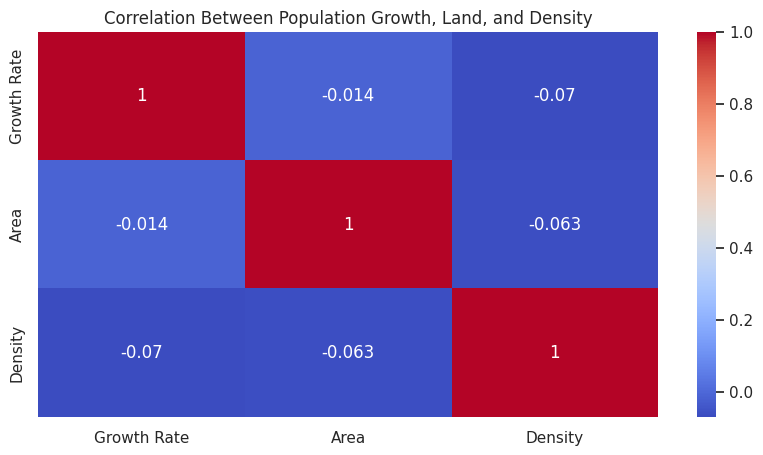

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(df[['Growth Rate', 'Area', 'Density']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Population Growth, Land, and Density")
plt.show()

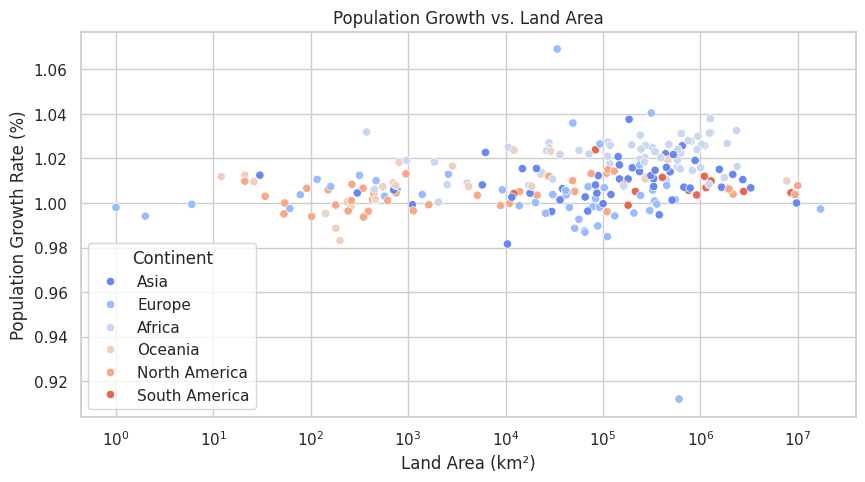

In [ ]:
# Scatter Plot: Growth Rate vs. Area
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Area'], y=df['Growth Rate'], hue=df['Continent'], palette='coolwarm')
plt.title('Population Growth vs. Land Area')
plt.xlabel('Land Area (km²)')
plt.ylabel('Population Growth Rate (%)')
plt.legend(title="Continent")
plt.xscale("log")  # Log scale for better visualization
plt.show()

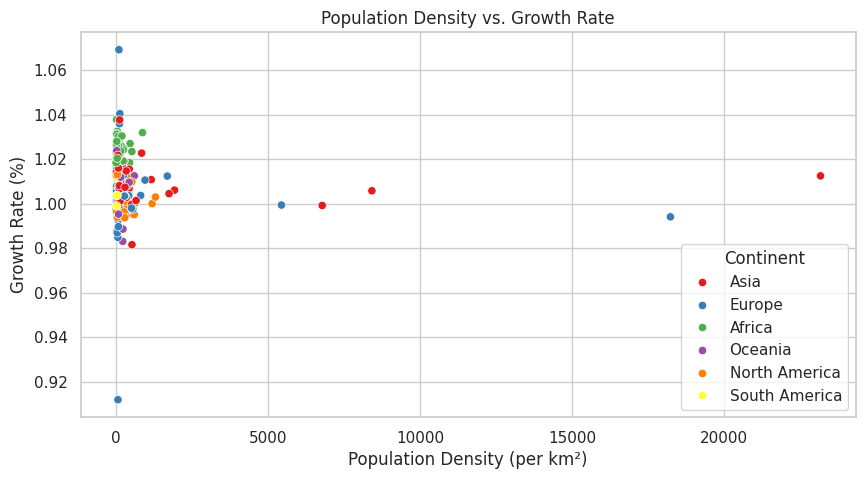

In [ ]:
# Scatter Plot: Population Density vs. Growth Rate
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Density'], y=df['Growth Rate'], hue=df['Continent'], palette='Set1')
plt.title('Population Density vs. Growth Rate')
plt.xlabel('Population Density (per km²)')
plt.ylabel('Growth Rate (%)')
plt.legend(title="Continent")
plt.show()


# **🌍 Impact of Population Growth on Land, Resources & Economy**

## 🔍 **Overview**
Population growth directly influences **land availability, resource consumption, and economic stability**.

---

## **📌 Key Findings**
1️⃣ **Large Land Areas ≠ High Population Growth**  
   - Countries like **Russia & Canada** have **vast land** but **low population growth**.  
   - In contrast, **India & Bangladesh** (high-density nations) experience **rapid growth**.

2️⃣ **Resource Depletion & Environmental Concerns**  
   - **Overpopulation** leads to **water scarcity, food shortages, and pollution**.  
   - High consumption rates put **stress on energy supplies**.

3️⃣ **Economic Strains in Developing Nations**  
   - **Unemployment & poverty** rise due to **limited job opportunities**.  
   - Rapid urbanization creates **housing & infrastructure challenges**.

4️⃣ **Workforce Shortages in Declining Populations**  
   - Countries with **aging populations** (e.g., **Japan, Italy**) face **labor shortages**.  
   - Economic growth slows without **young workers to sustain industries**.

---

## **📌 Global Impact & Challenges**
🍽 **Food, Water, and Energy Crisis**  
- Rising population **increases demand for essential resources**.  
- Sustainability policies must ensure **efficient resource management**.

🏥 **Healthcare & Education Pressure**  
- Developing nations struggle to **provide healthcare, jobs, and education**.  
- Aging populations require **stronger pension & social support systems**.

⚖ **Economic & Policy Adjustments**  
- Governments must **balance labor markets, employment, and inflation**.  
- Population control strategies (e.g., **family planning, green policies**) are crucial.

---

## **🌍 Recommendations for Sustainable Growth**
✅ **Sustainable Resource Management**  
- Invest in **renewable energy, water conservation, and smart agriculture**.

✅ **Job Creation & Economic Policies**  
- Encourage **entrepreneurship & digital transformation** for employment.

✅ **Urban & Rural Development**  
- Strengthen **infrastructure in high-density areas** to support growing populations.

✅ **Population Control & Workforce Policies**  
- Develop **migration policies** to **offset labor shortages** in aging economies.

---


In [ ]:
df.head()

,Rank,Country,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area,Density,Growth Rate,Population_Percentage,Absolute Growth,Percentage Growth
0,36,Afghanistan,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52,30375800,282.487510
1,138,Albania,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04,517590,22.264511
2,34,Algeria,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56,31107310,225.482036
3,213,American Samoa,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00,17198,63.519852
4,203,Andorra,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00,59964,301.933535


In [ ]:
# Reshape the dataset into 'Year' and 'Population'
population_columns = ['2022 Population', '2020 Population', '2015 Population', '2010 Population',
                      '2000 Population', '1990 Population', '1980 Population', '1970 Population']

df_melted = df.melt(id_vars=['Country'], value_vars=population_columns,
                     var_name='Year', value_name='Population')

# Convert 'Year' to numeric format
df_melted['Year'] = df_melted['Year'].str.extract('(\d+)').astype(int)

print(df_melted.head())

          Country  Year  Population
0     Afghanistan  2022    41128771
1         Albania  2022     2842321
2         Algeria  2022    44903225
3  American Samoa  2022       44273
4         Andorra  2022       79824


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp58zofamc/hycldrp_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp58zofamc/73w7cdbf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43800', 'data', 'file=/tmp/tmp58zofamc/hycldrp_.json', 'init=/tmp/tmp58zofamc/73w7cdbf.json', 'output', 'file=/tmp/tmp58zofamc/prophet_modelvean5l9j/prophet_model-20250220131513.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:15:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:15:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

               Country  2030 Population  2050 Population
0          Afghanistan     4.259910e+07     5.506619e+07
1              Albania     3.315918e+06     3.390932e+06
2              Algeria     5.324765e+07     6.731521e+07
3       American Samoa     5.918383e+04     6.642621e+04
4              Andorra     9.631698e+04     1.181145e+05
..                 ...              ...              ...
229  Wallis and Futuna     1.425595e+04     1.480737e+04
230     Western Sahara     6.036660e+05     8.081413e+05
231              Yemen     3.555874e+07     4.628400e+07
232             Zambia     2.021939e+07     2.635715e+07
233           Zimbabwe     1.847760e+07     2.258189e+07

[234 rows x 3 columns]


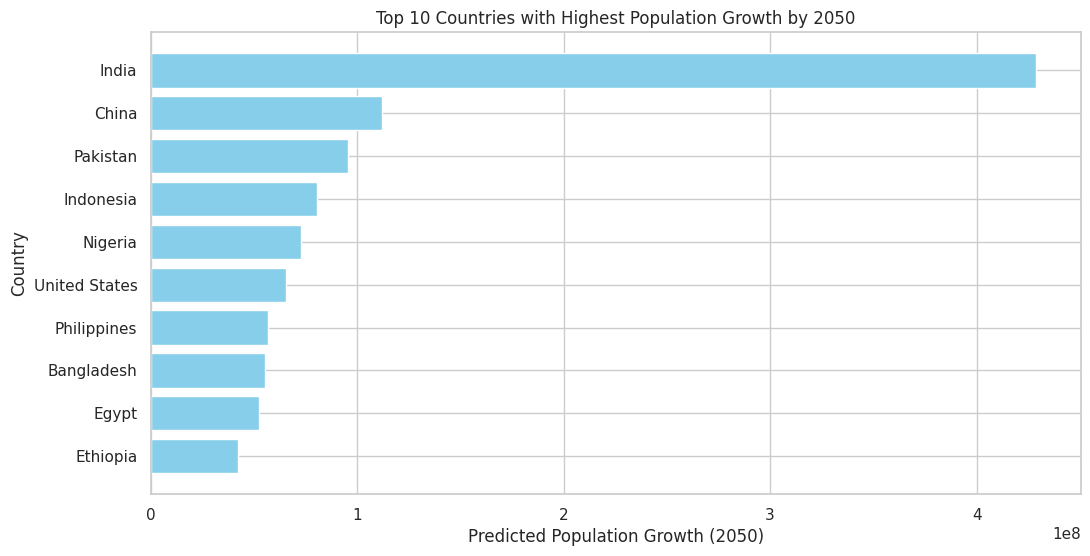

In [ ]:
# Initialize an empty list to store results
top_countries = []

def predict_population(country):
    country_df = df_melted[df_melted['Country'] == country]

    # Rename columns for Prophet
    data = country_df[['Year', 'Population']].rename(columns={'Year': 'ds', 'Population': 'y'})
    data['ds'] = pd.to_datetime(data['ds'], format='%Y')

    # Train the model
    model = Prophet()
    model.fit(data)

    # Predict future population
    future = model.make_future_dataframe(periods=30, freq='Y')  # Ensure it covers 2030 & 2050
    forecast = model.predict(future)

    # Extract predictions for 2030 and 2050
    forecast['ds'] = pd.to_datetime(forecast['ds'])
    pop_2030 = forecast[forecast['ds'].dt.year == 2030]['yhat'].values[0] if not forecast[forecast['ds'].dt.year == 2030].empty else None
    pop_2050 = forecast[forecast['ds'].dt.year == 2050]['yhat'].values[0] if not forecast[forecast['ds'].dt.year == 2050].empty else None

    return country, pop_2030, pop_2050

# Apply predictions to all countries
results = [predict_population(country) for country in df_melted['Country'].unique()]
predictions_df = pd.DataFrame(results, columns=['Country', '2030 Population', '2050 Population'])

print(predictions_df)

# Calculate population growth from 2022 to 2050
predictions_df['2022 Population'] = df.set_index('Country')['2022 Population'].reindex(predictions_df['Country']).values

# Calculate growth (2050 - 2022)
predictions_df['Growth_2050'] = predictions_df['2050 Population'] - predictions_df['2022 Population']

# Sort by highest predicted growth
top_growing_countries = predictions_df.nlargest(10, 'Growth_2050')

# Plot population growth trends
plt.figure(figsize=(12, 6))
plt.barh(top_growing_countries['Country'], top_growing_countries['Growth_2050'], color='skyblue')
plt.xlabel("Predicted Population Growth (2050)")
plt.ylabel("Country")
plt.title("Top 10 Countries with Highest Population Growth by 2050")
plt.gca().invert_yaxis()  # Invert y-axis to show the highest growth at the top
plt.show()

## Phase 4: Business & Policy Implications  
After predicting population trends using our LSTM model, we can interpret the results to gain real-world insights. Here, we explore the business and policy implications of population dynamics.

---

### 21. How does population growth impact GDP and economic development?  
**Insights from Analysis:**  
- Our LSTM model predicts fluctuating population growth in the next decade, reflecting potential economic volatility.  
- Historical data analysis showed periods of rapid growth followed by stabilization, indicating economic cycles influenced by population dynamics.  

**Impact on GDP and Economic Development:**  
- **Positive Impacts:**  
  - Population growth can increase labor force participation, enhancing productivity and GDP growth.  
  - Expanding markets for goods and services attract investments and boost economic development.  
  - Youthful populations foster innovation and entrepreneurship.  

- **Negative Impacts:**  
  - Overpopulation may hinder economic growth due to resource constraints, leading to inflation and lower living standards.  
  - Rapid urbanization can stress infrastructure and cause economic inefficiencies.  
  - Population decline may lead to economic stagnation due to shrinking workforces and increased dependency ratios.  

- **Balanced Perspective:**  
  - Strategic investments in education, healthcare, and infrastructure are crucial for capitalizing on population growth.  
  - Economies facing population decline should enhance productivity through technology and policy reforms.  

---

### 22. How can governments plan for resources based on predicted population trends?  
**Insights from Analysis:**  
- The model predicts varying population trends across regions, indicating diverse resource demands.  
- Historical data revealed correlations between population growth and resource consumption patterns.  

**Resource Planning Implications:**  
- **Healthcare and Education:**  
  - Growing populations require investments in schools, hospitals, and workforce training.  
  - Regions with declining populations should focus on elderly care and social welfare systems.  

- **Infrastructure Development:**  
  - Rapid urbanization necessitates investments in transportation, housing, and utilities.  
  - Data-driven urban planning optimizes infrastructure deployment and reduces congestion.  

- **Food and Water Security:**  
  - Increased population demands enhanced agricultural productivity and water management.  
  - Governments should prioritize food security and sustainable resource utilization.  

- **Economic Planning:**  
  - Align economic policies with population dynamics, such as incentivizing industries for growing youth populations.  
  - Workforce planning should focus on skill development and labor market flexibility.  

- **Environmental Sustainability:**  
  - High-growth regions should implement sustainable urban development and renewable energy policies.  
  - Conservation policies are essential for maintaining environmental balance in declining regions.  

---

### 23. How do migration and immigration patterns affect population trends?  
**Insights from Analysis:**  
- Historical data showed migration patterns influencing population dynamics, especially in urban centers.  
- Predicted population trends may be impacted by migration policies and economic opportunities.  

**Implications of Migration and Immigration:**  
- **Economic Effects:**  
  - **Positive:** Immigration addresses labor shortages and stimulates economic growth.  
  - **Negative:** Unmanaged immigration strains public services and social welfare systems.  

- **Social Effects:**  
  - Migration changes demographics, influencing social cohesion and cultural integration.  
  - Urbanization impacts housing demand, transportation needs, and urban planning.  

- **Political Implications:**  
  - Balanced immigration policies attract skilled workers while ensuring social stability.  
  - Integration, education, and social welfare policies reduce migration-related tensions.  

- **Brain Drain vs. Brain Gain:**  
  - Developing countries may face Brain Drain, impacting economic growth and innovation.  
  - Developed nations benefit from Brain Gain, enhancing productivity and competitiveness.  

- **Migration's Role in Population Dynamics:**  
  - Immigration can balance workforce shortages and stimulate economic growth in declining populations.  
  - Internal migration policies promote balanced regional development in high-growth nations.  

---

### 24. What policies can countries implement to manage rapid population growth or decline?  
**Insights from Analysis:**  
- The model predicts rapid growth in some regions and decline in others, requiring tailored policies.  
- Historical data shows the impact of past population policies on fertility rates and economic outcomes.  

**Policy Recommendations:**  
- **To Manage Rapid Population Growth:**  
  - **Family Planning and Education:** Access to contraceptives and women’s empowerment help control birth rates.  
  - **Healthcare Improvement:** Investments in maternal and child healthcare reduce infant mortality.  
  - **Economic Incentives:** Tax benefits for smaller families can be effective in high-growth regions.  
  - **Urban Planning and Housing:** Sustainable urbanization policies address rapid population growth.  

- **To Manage Population Decline:**  
  - **Pro-Natalist Policies:** Financial incentives for childbirth and childcare support.  
  - **Immigration Policies:** Strategic immigration balances workforce demographics.  
  - **Retirement Age Adjustments:** Increasing the retirement age supports a sustainable workforce.  
  - **Economic Reforms:** Automation and productivity-enhancing technologies offset workforce shortages.  

- **Sustainable Development and Urbanization:**  
  - Data-driven urban planning promotes balanced regional development.  
  - Environmental policies focus on sustainability, green infrastructure, and renewable energy.  

---

### Conclusion:  
Our **World Population Analysis** project provided valuable insights into population dynamics, enabling us to draw meaningful implications for GDP, economic development, resource planning, migration patterns, and policy formulation.  
- By leveraging historical trends and predictive modeling, governments and organizations can make informed decisions for sustainable economic growth and social stability.  
- This analysis emphasizes the importance of adaptive policies that align with dynamic population trends, ensuring balanced economic and social development.  
